In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
pi = np.pi
cos = np.cos
sin = np.sin
sqrt = np.sqrt
h = 6.626e-34   #planck in J/Hz
phi0 = 2.067e-15   #Fluxquantum in Vs
e0 = 8.854e-12   #epsilon0 in As/Vm
mu0 = 1.257e-6   #µ0 in H/m
kB = 1.38e-23   #boltzmann cons. in J/K

## 1.2.4 (Noise)

In [138]:
#epsilon estimate
T = 100e-3   #mK
C = 3e-12   #pF
Ls = 100e-12   #pH
Ic = 1e-6   #µA
Rs = 10  #Ohm

def betaC(Ic,C,Rs):
    return 2*Ic*pi*C*Rs**2/phi0

def epsilon(T,C,Ls,Rs):
    return 16*kB*T*sqrt(Ls*C/betaC(Ic,C,Rs))/h

epsilon(T,C,Ls,Rs), betaC(Ic,C,Rs)

(0.6044048513949449, 0.9119282013323058)

## 2.2.1 (Amplifier noise)

In [139]:
Sphi_s = (1e-6)**2   #muPhi0**2/hz
Sv = (0.33e-9)**2
Si = (2.6e-12)**2
Vphi = 600e-6
Iphi = 12e-6

def singlestage_noise():
    return sqrt(Sv/Vphi**2/16**2 + Si/Iphi**2/16**2)

singlestage_noise(), sqrt(Sv)/(16*80e-6)

(3.6946141356183754e-08, 2.5781249999999997e-07)

## 2.2.2 (Amplifier noise - 2stage)

In [140]:
Gphi = pi
def twostage_rta_noise():
    return sqrt(Sv/Vphi**2/Gphi**2/18**2 + Si/Iphi**2/Gphi**2)
twostage_rta_noise(), sqrt(Sv/Vphi**2/Gphi**2/16**2), sqrt(Si/Iphi**2/Gphi**2)

(6.964958281698117e-08, 1.0941902337567805e-08, 6.896714200648797e-08)

## 2.3 (Flux-toFlux transter maximization)

In [141]:
Lm = 13.3e-9
Lpar = 0.5e-9
Ls = 106e-12
kis = 0.7
def Li_theo(n):
    return 1.64e-9*n**2
#Li=160e-9

def ftf(Li):
    return kis*sqrt(Ls*Li)/(Lm+2*(Li+Lpar))

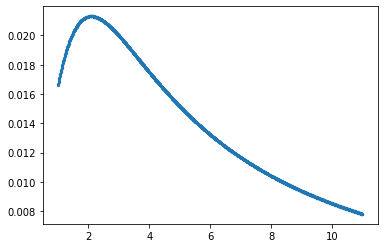

In [142]:
n=np.arange(1,11,0.01)
plt.scatter(n,ftf(Li_theo(n)), s=5)

#plot for results chapter?

In [143]:
n[np.argmax(ftf(Li_theo(n)))]

2.0900000000000007

In [144]:
(3.3e-6/2.067e-15)**-1

6.263636363636362e-10

In [145]:
626e-12/sqrt(6.57e-9*120e-12)

0.7050193314634637

In [146]:
626e-12/(2*(0.5e-9+6.65e-9+6.57e-9))

0.0228134110787172

In [147]:
2.28/1.95

1.169230769230769

In [148]:
328e-12/(2*(0.5e-9+6.65e-9+1.27e-9))

0.019477434679334917

## 3.1 (Flux-to-transfer + extr. energy sens. [theo]) 

In [161]:
phi0 = 2.0678e-15
kb = 1.38e-23 
h = 6.626e-34
T = 20e-3
Ic = 6e-6
C = 0.95e-12
Ls = 147e-12
Lpar = 0.5e-9
Lm = 13.3e-9
Lp = Lm/2
Li_opt = Lp+Lpar
kis = 0.75
sin = Li/(Li_opt + Lpar + Lp)

def betaL(Ls):
    return 2*Ic*Ls/phi0

def betaC(Rs):
    return 2*np.pi*Ic*Rs**2*C/phi0

def ep(Rs,Ls):
    return kb*T*np.sqrt(betaL(Ls)*phi0*C/(2*Ic))*np.sqrt(np.pi*betaL(Ls)/betaC(Rs))*((1-kis**2*sin)**2+np.sqrt(2)*(1+betaL(Ls))**2/betaL(Ls)**2)*(2*Lpar+Lm)/(kis**2*sin**2*Lm)

print(f'theo. obtainable energy sens.:  {ep(6.3,147e-12)/h:.3}' + 'h')
print(f'theo. obtainable deltaS/deltaP corresponnding to single Lp: {2*ftf(Li_opt)*100:.3}' + '%')
print(f'theo. obtainable deltaS/delta corresponnding to parallel meander Lp: {ftf(Li_opt)*100:.3}' + '%')

theo. obtainable energy sens.:  0.534h
theo. obtainable deltaS/deltaP corresponnding to single Lp: 5.38%
theo. obtainable deltaS/delta corresponnding to parallel meander Lp: 2.69%


In [ ]:
Li_opt

In [ ]:
Li_theo(2.09)

In [ ]:
#Energieausflösung detektor???

In [ ]:
betaC(6)

In [ ]:
Mis_theo_max = kis*sqrt(Li_opt*Ls)

## 3.1 (Critical B-Field)

In [ ]:
def Bcrit(w):
    return 1.65*phi0/w**2
w = np.linspace(1,21,2000)*1e-6
plt.plot(w,Bcrit(w)*1e6)

In [ ]:
def wi(B):
    return sqrt(1.65*phi0/B)
wi(65e-6)

In [ ]:
1/(11.8*1e4)

In [ ]:
4*26/2.4


In [162]:
2*5.85

11.7

## 4.1 

In [184]:
#Ic (Ib)

def ic(ib,T):
    return ib/2 + kB*T/phi0*(1+sqrt(1+ib*phi0/(kB*T)))

ic(11.615,0.15), 11.615/2
#this or median of all 10 Ic's?    

(5.807607831226785, 5.8075)

In [190]:
jc=5.84e-6/(4.5e-6)**2
jc/1e4


29.62962962962963

In [192]:
#deviations
(6-5.84)/6, (29.6296-28.84)/30

(0.02666666666666669, 0.026320000000000003)

In [172]:
1.7/29.97

0.05672339005672339

In [179]:
0.16/6

0.02666666666666667